In [1]:
import pandas as pd
import os
from scipy import stats
import numpy as np
import seaborn as sns 


import matplotlib.pyplot as plt
import math

In [2]:
path = os.path.join("./", "amazon_final_clean.csv")
path

'./amazon_final_clean.csv'

In [3]:
df_clean = pd.read_csv(path)
df_clean

,ID,MOVIE_NAME,LANGUAGE,IMBD_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
0,233,Bandhuvulostunnaru Jagratha,Telugu,6.8,1989,All,120.0
1,234,Troop Zero,English,6.9,2020,7+,97.0
2,235,Cowgirls 'n Angels 2: Dakota's Summer,English,5.6,2014,13+,90.0
3,236,Around The World In 80 Days,English,5.9,2004,7+,119.0
4,237,Horns,English,6.5,2014,18+,115.0
...,...,...,...,...,...,...,...
5831,8121,Borat Subsequent Moviefilm,English,6.7,2020,18+,96.0
5832,8122,Blackout,English,5.2,2014,18+,91.0
5833,8123,Loafer,Hindi,6.5,1973,All,123.0
5834,8124,Remember Me,English,7.1,2010,13+,112.0


In [4]:
df_clean.rename(
        columns = {
            'MOVIE_NAME' : 'Movie Name',
            'LANGUAGE' : 'Language',
            'IMBD_RATING' : 'IMDb Rating',
            'YEAR_OF_RELEASE' : 'Year of Release',
            'MATURITY_RATING' : 'Maturity Rating',
            'MINUTES' : 'Minutes'
        },
    inplace=True
)
df_clean

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
0,233,Bandhuvulostunnaru Jagratha,Telugu,6.8,1989,All,120.0
1,234,Troop Zero,English,6.9,2020,7+,97.0
2,235,Cowgirls 'n Angels 2: Dakota's Summer,English,5.6,2014,13+,90.0
3,236,Around The World In 80 Days,English,5.9,2004,7+,119.0
4,237,Horns,English,6.5,2014,18+,115.0
...,...,...,...,...,...,...,...
5831,8121,Borat Subsequent Moviefilm,English,6.7,2020,18+,96.0
5832,8122,Blackout,English,5.2,2014,18+,91.0
5833,8123,Loafer,Hindi,6.5,1973,All,123.0
5834,8124,Remember Me,English,7.1,2010,13+,112.0


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5836 non-null   int64  
 1   Movie Name       5836 non-null   object 
 2   Language         5836 non-null   object 
 3   IMDb Rating      5836 non-null   float64
 4   Year of Release  5836 non-null   int64  
 5   Maturity Rating  5836 non-null   object 
 6   Minutes          5822 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 319.3+ KB


In [6]:
#Create a dataframe with maturity rating for all age groups
df_maturity_rating = df_clean[df_clean['Maturity Rating'] == 'All']
df_maturity_rating

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
0,233,Bandhuvulostunnaru Jagratha,Telugu,6.8,1989,All,120.0
6,239,Pokkiri Raja,Tamil,6.2,1982,All,138.0
10,248,Prematho Mee Karthik,Telugu,6.6,2017,All,115.0
11,250,Overtake,Malayalam,6.8,2017,All,119.0
15,255,Chaos Theory,Malayalam,6.6,2018,All,17.0
...,...,...,...,...,...,...,...
5824,8114,Pata Nahi Rabb Kehdeyan Rangan Ch Raazi,Punjabi,6.5,2012,All,152.0
5827,8117,Munna Bhai M.B.B.S.,Hindi,8.1,2003,All,149.0
5828,8118,Badla,Bengali,6.6,2010,All,149.0
5830,8120,Artist,Malayalam,7.1,2013,All,107.0


In [7]:
df_avg = df_clean.groupby("Language").mean()
df_avg

,ID,IMDb Rating,Year of Release,Minutes
Language,,,,
Bengali,4059.260870,6.506805,2010.466919,123.619318
English,4005.710788,6.348508,2009.801836,99.232184
Gujarati,4354.273973,6.519178,2015.082192,125.287671
Hindi,4137.143136,5.954717,2004.080677,126.122555
Kannada,3913.908730,6.766270,1999.603175,135.591270
Malayalam,3960.464203,6.181755,2005.230947,132.330254
Marathi,4277.885246,6.488852,2009.849180,124.505017
Punjabi,3503.581967,5.942623,2015.467213,131.750000
Tamil,3935.018771,6.219625,2005.935154,130.433447


In [8]:
language_df = df_clean.groupby("Language").count()
language_df

,ID,Movie Name,IMDb Rating,Year of Release,Maturity Rating,Minutes
Language,,,,,,
Bengali,529,529,529,529,529,528
English,1307,1307,1307,1307,1307,1305
Gujarati,73,73,73,73,73,73
Hindi,1537,1537,1537,1537,1537,1534
Kannada,252,252,252,252,252,252
Malayalam,433,433,433,433,433,433
Marathi,305,305,305,305,305,299
Punjabi,122,122,122,122,122,120
Tamil,586,586,586,586,586,586


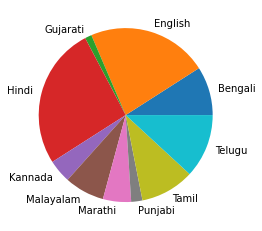

In [9]:
#Pie chart to show the distribution of movies for each language
plt.pie(language_df["Movie Name"], labels= language_df.index)
plt.show()

In [10]:
#Create a dataframe with only movies in English
df_english = df_clean[df_clean["Language"] == "English"]
df_english

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
1,234,Troop Zero,English,6.9,2020,7+,97.0
2,235,Cowgirls 'n Angels 2: Dakota's Summer,English,5.6,2014,13+,90.0
3,236,Around The World In 80 Days,English,5.9,2004,7+,119.0
4,237,Horns,English,6.5,2014,18+,115.0
5,238,Book of Shadows: The Blair Witch 2,English,4.0,2000,18+,90.0
...,...,...,...,...,...,...,...
5820,8107,Annabelle (2014),English,5.4,2014,18+,98.0
5825,8115,Secretary (2002),English,7.0,2002,18+,111.0
5831,8121,Borat Subsequent Moviefilm,English,6.7,2020,18+,96.0
5832,8122,Blackout,English,5.2,2014,18+,91.0


In [11]:
#Average rating for movies in English
avg_english_rating = df_english["IMDb Rating"].mean()
avg_english_rating

6.348508033664881

In [12]:
#Create a dataframe with only movies in Bengali
df_bengali = df_clean[df_clean["Language"] == "Bengali"]
df_bengali

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
26,268,Aparajito,Bengali,8.4,2017,13+,93.0
57,314,Kaya Hiner Kahini,Bengali,6.9,1973,NR,113.0
62,322,The Bongs Again,Bengali,5.5,2017,13+,116.0
129,417,Dracula Sir,Bengali,7.2,2020,13+,125.0
152,454,Har Har Byomkesh,Bengali,6.8,2017,13+,113.0
...,...,...,...,...,...,...,...
5754,8013,Chorabali,Bengali,5.9,2016,13+,105.0
5800,8078,Guru Dakshina,Bengali,7.2,1987,All,146.0
5819,8106,Indrani,Bengali,7.3,2017,13+,121.0
5822,8112,Bhanu Goenda Jahar Assistant,Bengali,6.9,2017,13+,107.0


In [13]:
#Average rating for movies in Bengali
avg_bengali_rating = df_bengali["IMDb Rating"].mean()
avg_bengali_rating

6.5068052930056695

In [14]:
#Create a dataframe with only movies in Telugu
df_telugu = df_clean[df_clean["Language"] == "Telugu"]
df_telugu

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
0,233,Bandhuvulostunnaru Jagratha,Telugu,6.8,1989,All,120.0
8,242,Lacchimdeviki O Lekkundi,Telugu,5.2,2016,13+,107.0
10,248,Prematho Mee Karthik,Telugu,6.6,2017,All,115.0
19,261,Fantastic Beasts and Where to Find Them,Telugu,7.3,2016,13+,132.0
35,282,Mahanati (Telugu),Telugu,8.5,2018,All,170.0
...,...,...,...,...,...,...,...
5785,8056,Sundarangudu,Telugu,6.9,2004,All,119.0
5790,8063,Bhadra,Telugu,6.7,2005,18+,153.0
5792,8066,Adrift,Telugu,6.6,2018,16+,92.0
5803,8085,Special,Telugu,6.3,2019,13+,120.0


In [15]:
#Average rating for movies in Telugu
avg_telugu_rating = df_telugu["IMDb Rating"].mean()
avg_telugu_rating

6.256069364161849

In [16]:
#Create a dataframe with only movies in Hindi
df_hindi = df_clean[df_clean["Language"] == "Hindi"]
df_hindi

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
9,245,Salaam Namaste,Hindi,6.2,2005,13+,158.0
17,258,Encounter - The Killing,Hindi,6.3,2002,13+,146.0
18,259,Agnipankh,Hindi,4.5,2004,All,134.0
23,265,2016 The End,Hindi,5.8,2017,13+,121.0
25,267,Rocket Singh Salesman of the Year,Hindi,7.5,2009,13+,154.0
...,...,...,...,...,...,...,...
5826,8116,Veer Zaara,Hindi,7.8,2004,7+,192.0
5827,8117,Munna Bhai M.B.B.S.,Hindi,8.1,2003,All,149.0
5829,8119,Aranyaka,Hindi,6.7,1994,NR,83.0
5833,8123,Loafer,Hindi,6.5,1973,All,123.0


In [17]:
#Average rating for movies in Hindi
avg_hindi_rating = df_hindi["IMDb Rating"].mean()
avg_hindi_rating

5.954716981132077

In [18]:
#Create a dataframe with only movies in Tamil
df_tamil = df_clean[df_clean["Language"] == "Tamil"]
df_tamil

,ID,Movie Name,Language,IMDb Rating,Year of Release,Maturity Rating,Minutes
6,239,Pokkiri Raja,Tamil,6.2,1982,All,138.0
16,256,Maharasan,Tamil,6.2,1993,NR,144.0
27,269,Sivakasi,Tamil,5.3,2005,All,175.0
28,270,Big Game,Tamil,5.4,2015,16+,87.0
63,323,Mettukudi,Tamil,6.6,1996,All,135.0
...,...,...,...,...,...,...,...
5778,8048,"Alexander (Tamil Language, English Subtitled)",Tamil,6.1,1996,13+,125.0
5786,8058,The Room,Tamil,6.0,2019,18+,99.0
5789,8061,Vallarasu,Tamil,6.2,2000,All,167.0
5798,8074,Bale Pandiya,Tamil,7.8,1962,NR,151.0


In [19]:
#Average rating for movies in Tamil
avg_tamil_rating = df_tamil["IMDb Rating"].mean()
avg_tamil_rating

6.219624573378844

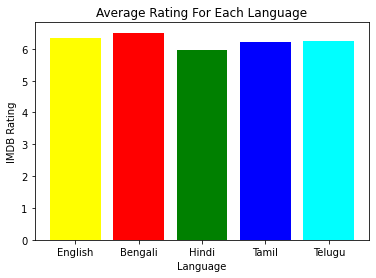

In [20]:
#Bar Chart showing IMDB Rating for movies in each language
avg_rating = [avg_english_rating, avg_bengali_rating, avg_hindi_rating, avg_tamil_rating, avg_telugu_rating]
avg_language = ["English", "Bengali", "Hindi", "Tamil", "Telugu"]

plt.bar(avg_language, avg_rating, color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Language")
plt.ylabel("IMDB Rating")
plt.title("Average Rating For Each Language")

plt.show()

C:\Users\zelda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


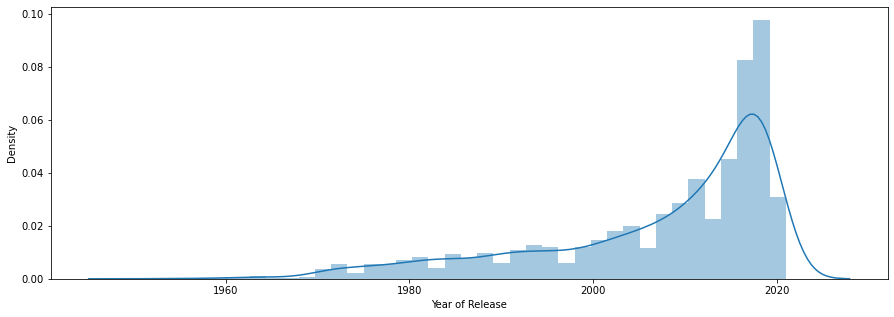

In [21]:
#Distribution chart shows that there are more Amazon Prime movies made in recent years as opposed to early years
plt.figure(figsize = (15,5))
ax = sns.distplot(df_clean['Year of Release'])

<AxesSubplot:xlabel='Minutes', ylabel='IMDb Rating'>

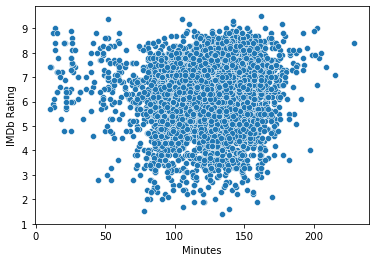

In [22]:
sns.scatterplot(x="Minutes", y="IMDb Rating", data=df_clean)
# Scatterplot has no linearity. No correlation between movie length and IMDb Rating. Movie length does not affect the whether or not a movies is highly rated.

In [23]:
#Do movies have higher ratings when they are longer, or do they have higher ratings when they are shorter?
#Is there a statistically significant difference in ratings between films longer than 100 minutes and shorter than 100 minutes
#Ho: There is no difference in ratings for films longer and shorter than 100 minutes
#Ha: There is a statistical difference in rating between longer and shorter films.

long_films = df_clean.iloc[(df_clean['Minutes'] <= 100).values]
short_films = df_clean.iloc[(df_clean['Minutes'] > 100).values]

stats.ttest_ind(long_films['IMDb Rating'], short_films['IMDb Rating'])

Ttest_indResult(statistic=-10.073685450318951, pvalue=1.127981205095819e-23)

In [24]:
#P-value < alpha at 0.05. Significant evidence to reject Ho.
#There is a difference in film ratings between longer and shorter films
#Which has the higher ratings?
df_long_film = df_clean[df_clean["Minutes"] >= 100]
df_long_film
avg_long_film = df_long_film["IMDb Rating"].mean()
avg_long_film

6.330520332313082

In [25]:
df_short_film = df_clean[df_clean["Minutes"] < 100]
df_short_film
avg_short_film = df_short_film["IMDb Rating"].mean()
avg_short_film
#Movies that are 100 minutes or longer has statistically higher ratings than movies less than 100 minutes

5.913141025641027

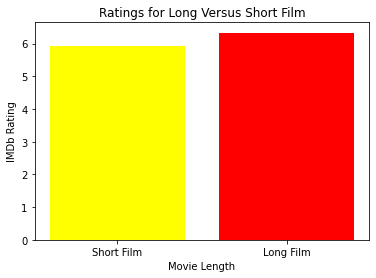

In [26]:
x_axis = ["Short Film", "Long Film"]
y_axis = [avg_short_film, avg_long_film ]
plt.bar(x_axis, y_axis, color=['yellow', 'red'])
plt.xlabel("Movie Length")
plt.ylabel("IMDb Rating")
plt.title("Ratings for Long Versus Short Film")

plt.show()

In [27]:
# df_boxplot = sns.boxplot(y="IMDb Rating", hue="Maturity Rating", x="Minutes", data=df_clean)
# plt.show(df_boxplot)

KeyboardInterrupt: 